# 

# 

# Red Wine Quality Prediction Project

### Project Objective:

The project's central aim is to determine which physicochemical properties contribute to categorizing wine as 'good' or 'not good.' This dataset contains information about red and white wine variants of the Portuguese "Vinho Verde" wine, focusing solely on physicochemical and sensory variables while omitting factors like grape type or brand. The classification task involves differentiating between 'good' and 'not good' wines, where 'good' wines have a quality score of 7 or higher, while the rest are considered 'not good.' This project will explore which physicochemical characteristics play a significant role in classifying wine quality, and it may involve feature selection techniques to identify the most relevant attributes for this classification.

# 

# 

## Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

# 

## Import Dataset

In [2]:
data=pd.read_csv("winequality-red1.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 

## EDA

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.shape

(1599, 12)

In [5]:
data.isna().sum().sum()

0

### Dropping Duplicates

In [6]:
data.duplicated().sum()

240

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

### Checking Unque values

In [8]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: fixed acidity
Unique Values: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]


Column: volatile acidity
Unique Values: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09


In [9]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# 

# 

## Feature Selection

In [10]:
data.shape

(1359, 12)

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Separating Features & Target

In [12]:
x = data.iloc[:,0:11]
y = data.iloc[:, -1]

x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [13]:
y[2]

5

### Getting Contribution Scores of Features

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(x,y)

In [16]:
feature_scores = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(fit.scores_)], axis= 1) 
feature_scores.columns = ["Feature", "Score"]
feature_scores.sort_values (by="Score", ascending=False)

,Feature,Score
6,total sulfur dioxide,2538.395288
5,free sulfur dioxide,162.301786
10,alcohol,42.149269
1,volatile acidity,14.171001
2,citric acid,10.826370
0,fixed acidity,9.269539
3,residual sugar,4.127193
9,sulphates,3.849872
4,chlorides,0.735314
8,pH,0.156992


#####  Columns 'density' & 'pH' have almost negligible contribution score, and can be eliminated. But we must check more details before eliminating them

In [17]:
feature_scores.nlargest(10, "Score")

,Feature,Score
6,total sulfur dioxide,2538.395288
5,free sulfur dioxide,162.301786
10,alcohol,42.149269
1,volatile acidity,14.171001
2,citric acid,10.826370
0,fixed acidity,9.269539
3,residual sugar,4.127193
9,sulphates,3.849872
4,chlorides,0.735314
8,pH,0.156992


In [18]:
feature_scores.nlargest(6, "Score")

,Feature,Score
6,total sulfur dioxide,2538.395288
5,free sulfur dioxide,162.301786
10,alcohol,42.149269
1,volatile acidity,14.171001
2,citric acid,10.826370
0,fixed acidity,9.269539


### Visual Representation of Feature Contribution

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [21]:
print(model.feature_importances_)

[0.07546526 0.09710522 0.08232973 0.07872051 0.07705774 0.07479849
 0.10450428 0.08386402 0.07502349 0.10223343 0.14889783]


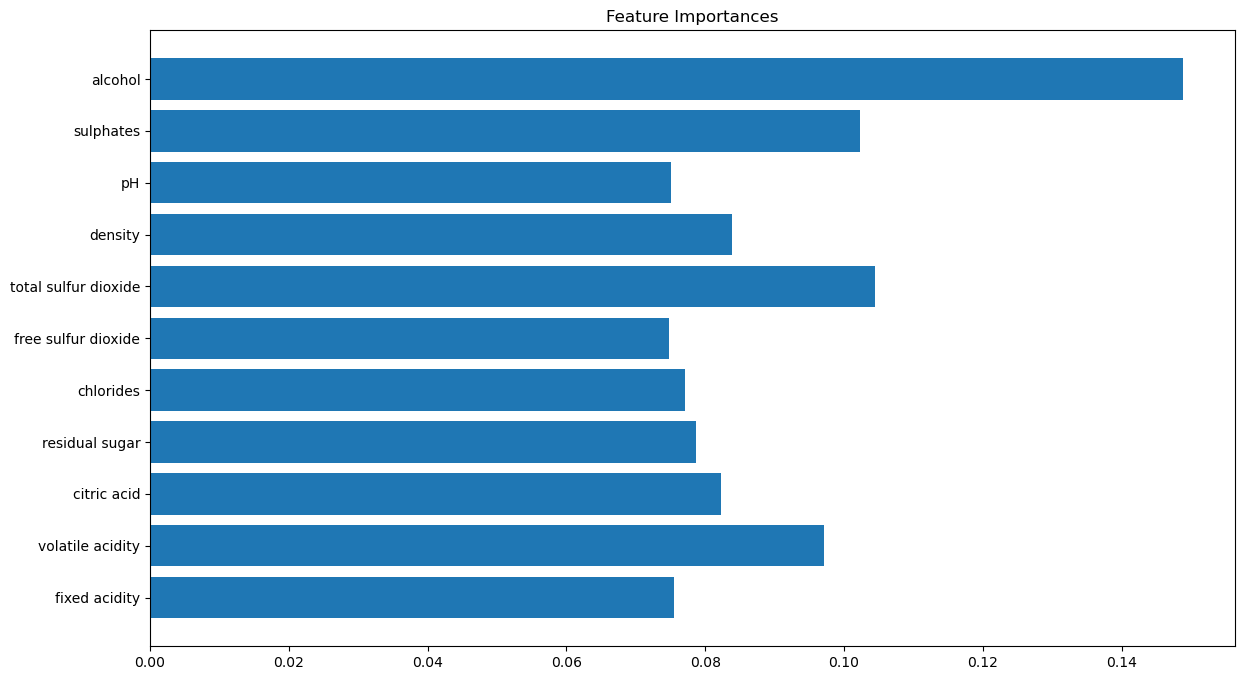

In [22]:
plt.figure(figsize=(14,8))
plt.barh(x.columns, model.feature_importances_) 
plt.title("Feature Importances")
plt.show()

# 

# 

## Checking Data Distribution

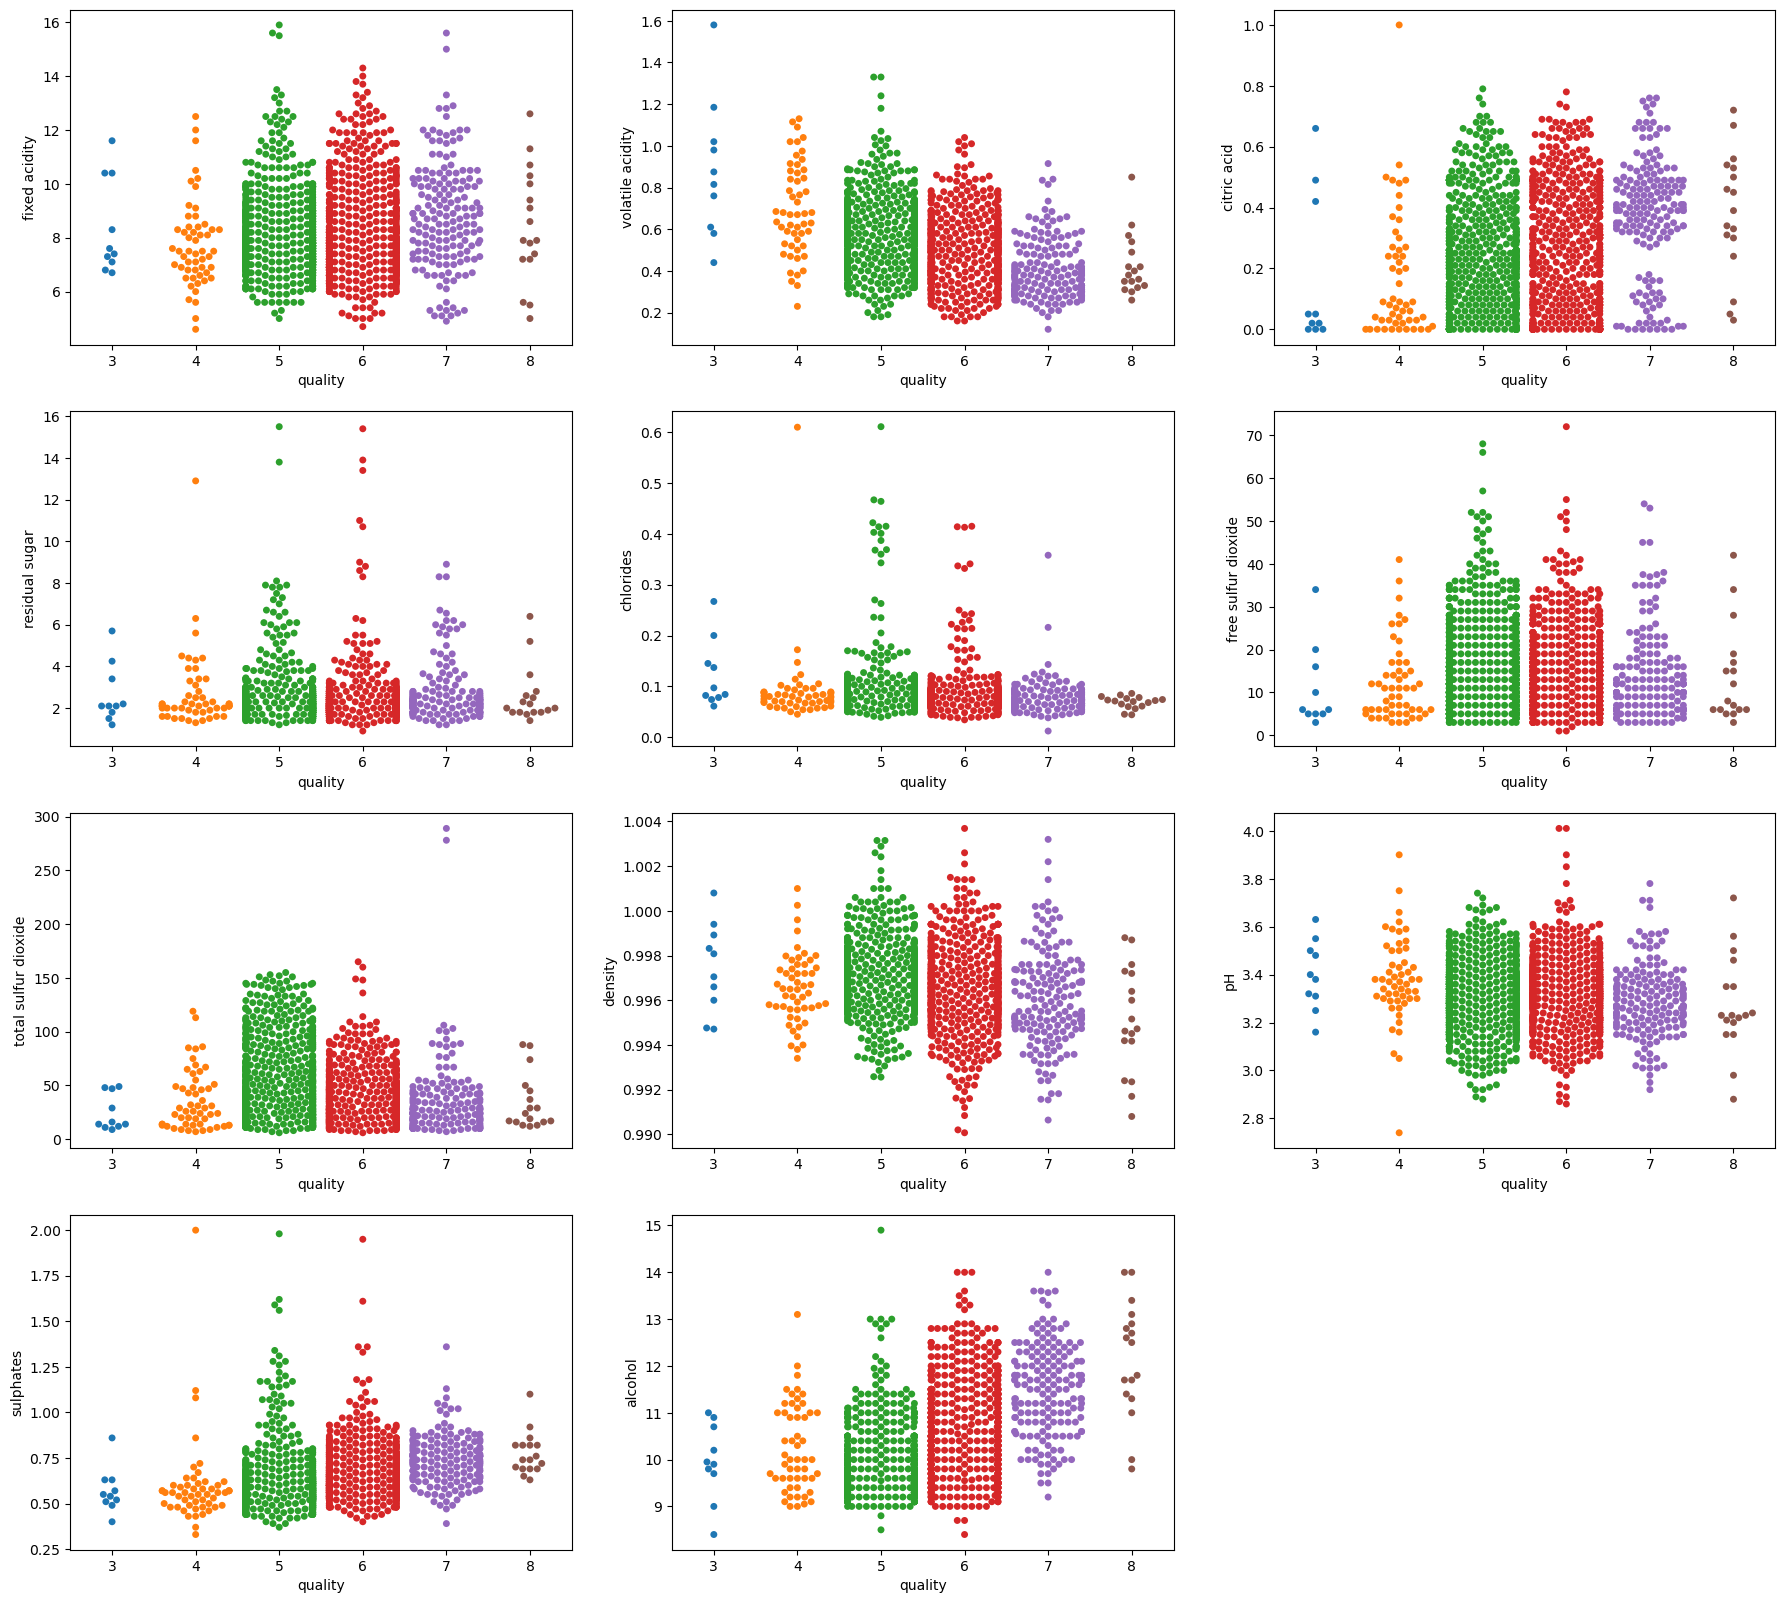

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22,20))
plotnumber = 1

for column in x:
    if plotnumber<=11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.swarmplot(y,x[column])

    plotnumber+=1
plt.show()

In [24]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

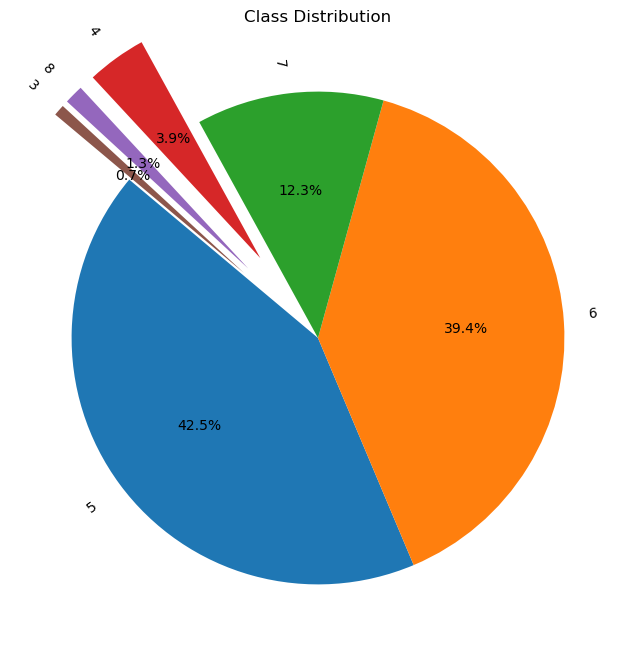

In [25]:
class_counts = y.value_counts()

labels = class_counts.index
counts = class_counts.values


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, explode=[0, 0, 0, 0.4, 0.4, 0.4], autopct='%1.1f%%', startangle=140, rotatelabels=True)
plt.title("Class Distribution")

plt.show()

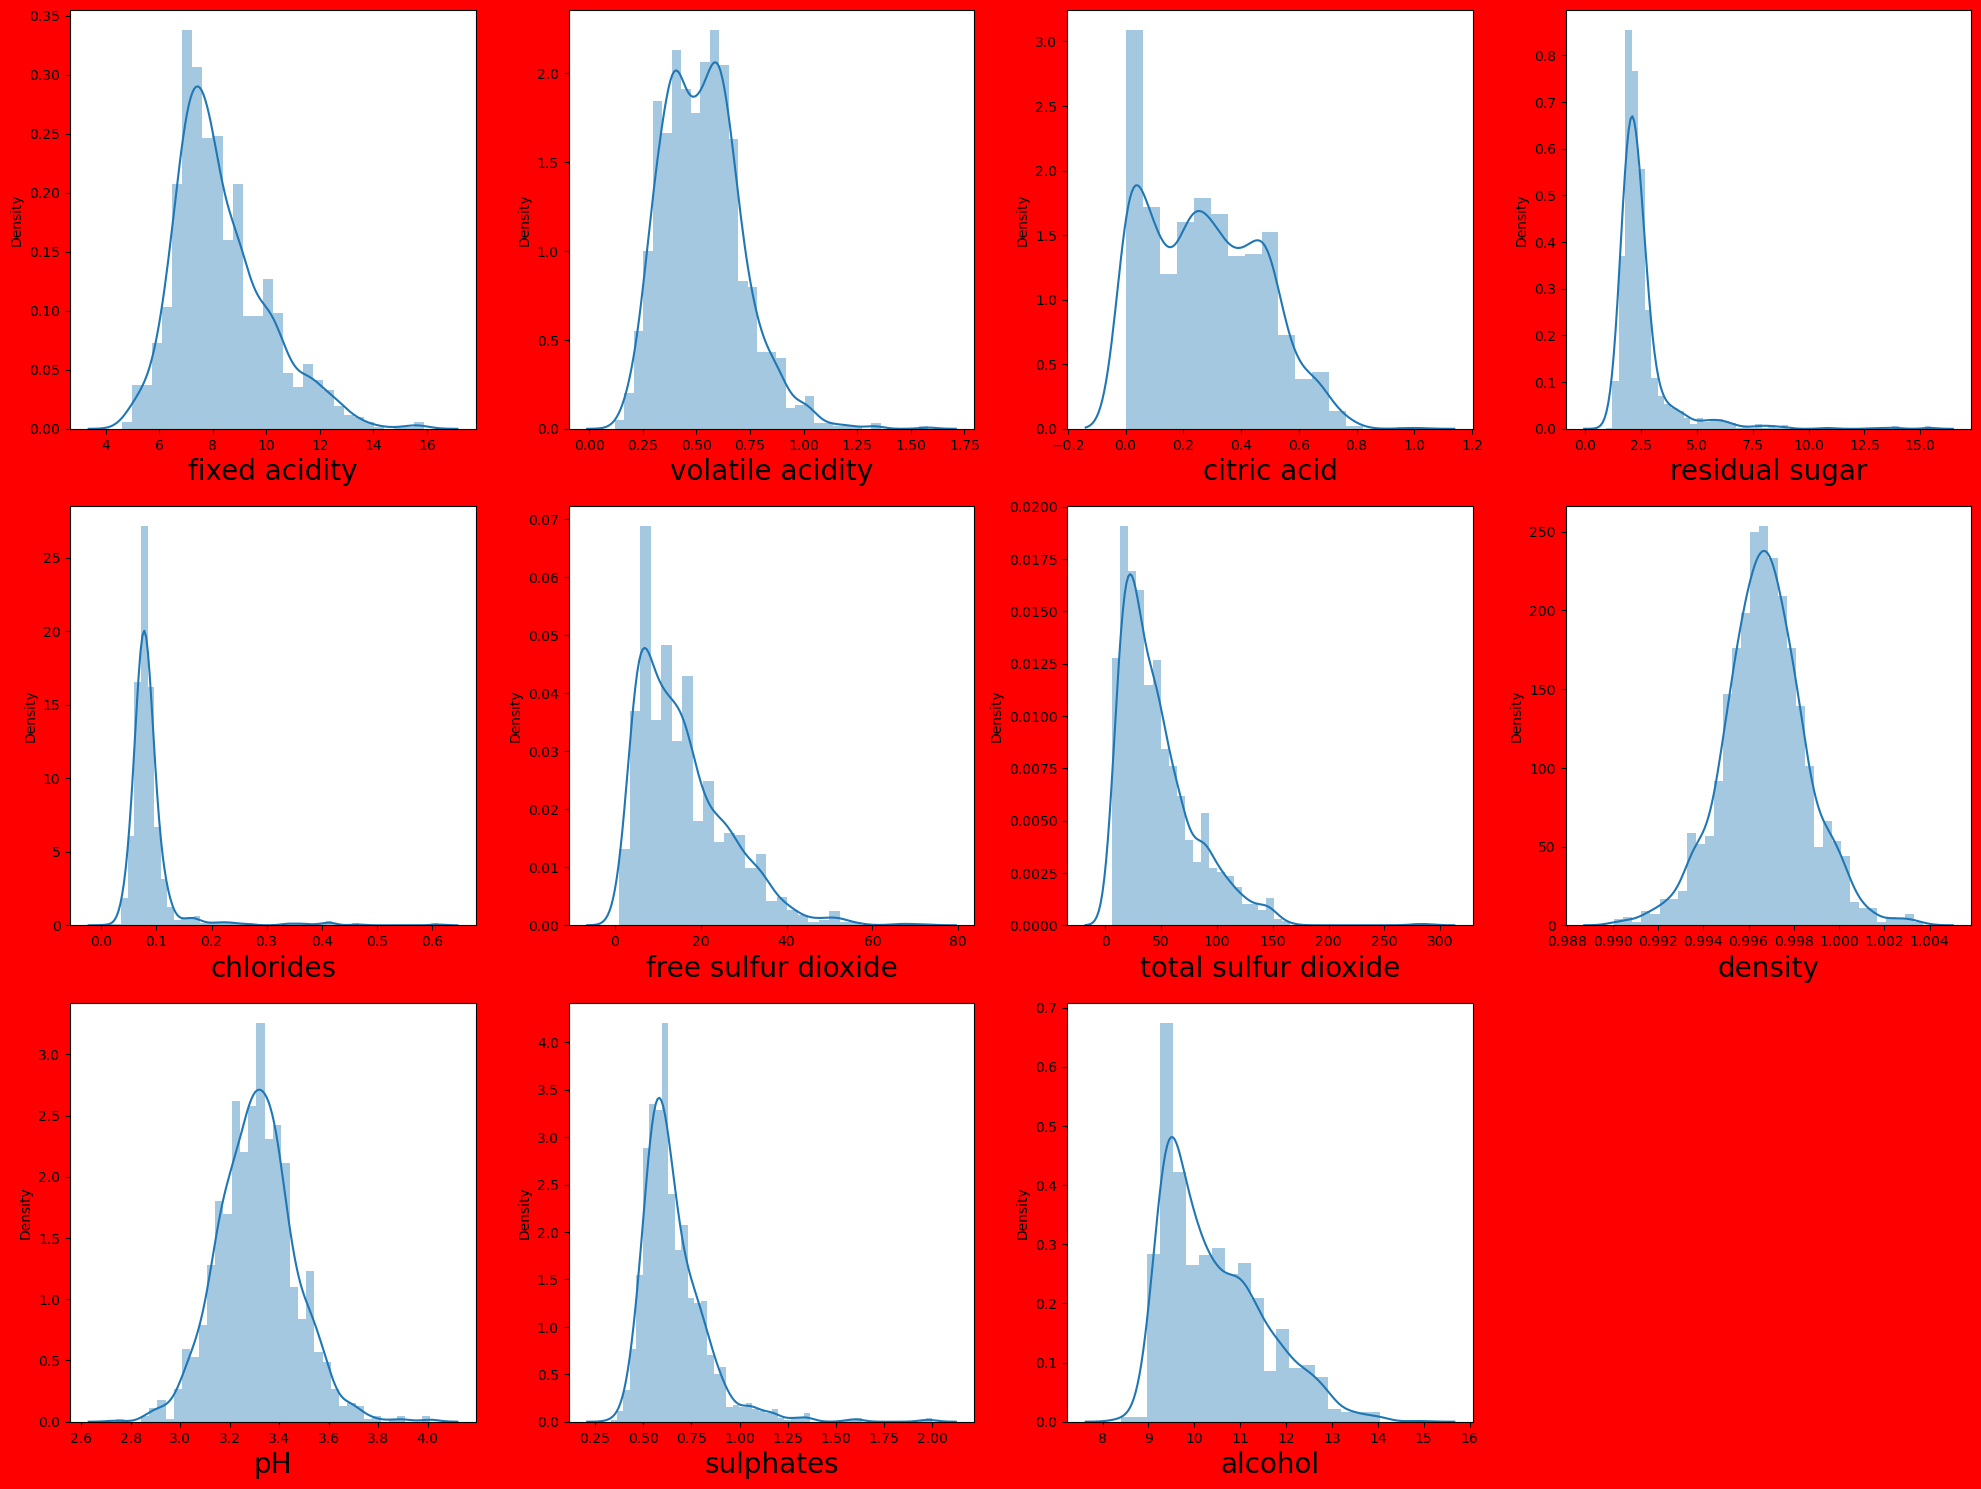

In [26]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in x:                       
    if plotnumber<=11:                    
        ax = plt.subplot(3,4,plotnumber)    
        sns.distplot(x[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout() 

# 

# 

## Removing Multi-colinearity

In [27]:
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


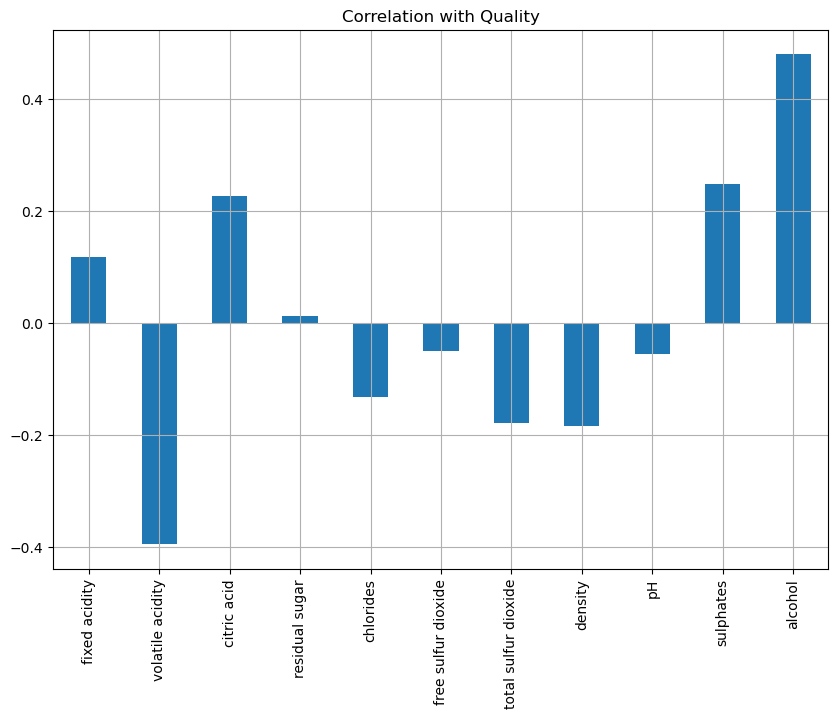

In [28]:
data.drop('quality', axis=1).corrwith(data.quality).plot(kind='bar', grid=True, figsize=(10, 7), title="Correlation with Quality")
plt.show()

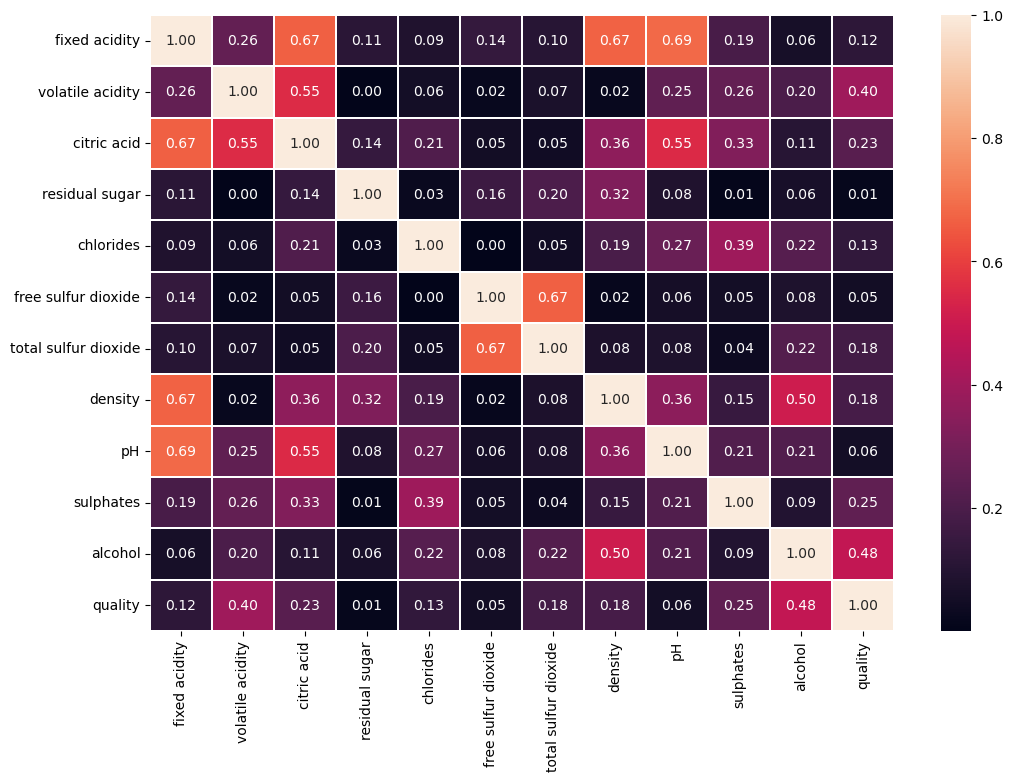

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = data.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(dt_corr, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

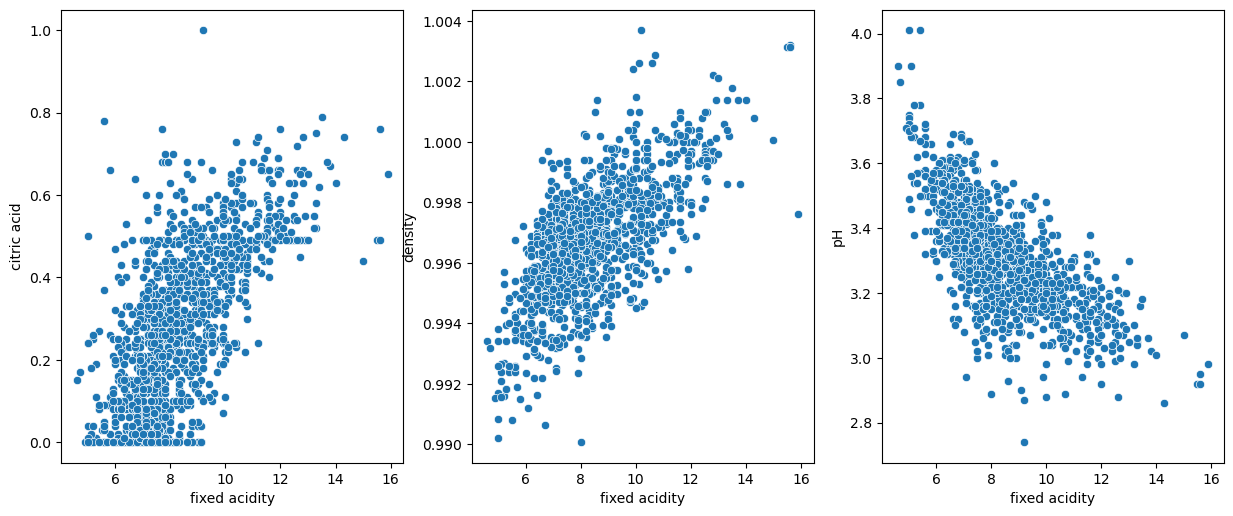

In [30]:
Y=data[['citric acid', 'density', 'pH']].copy()

plt.figure(figsize=(15,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'fixed acidity', y = Y[column], data = data)

    plotnumber+=1
plt.show()

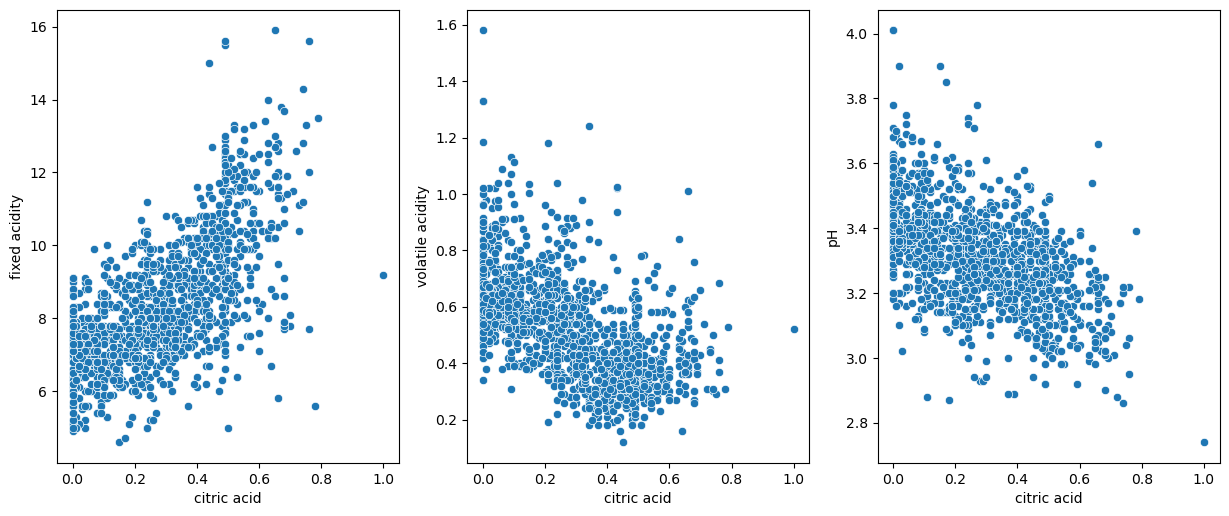

In [31]:
Y=data[['fixed acidity', 'volatile acidity', 'pH']].copy()

plt.figure(figsize=(15,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'citric acid', y = Y[column], data = data)

    plotnumber+=1
plt.show()

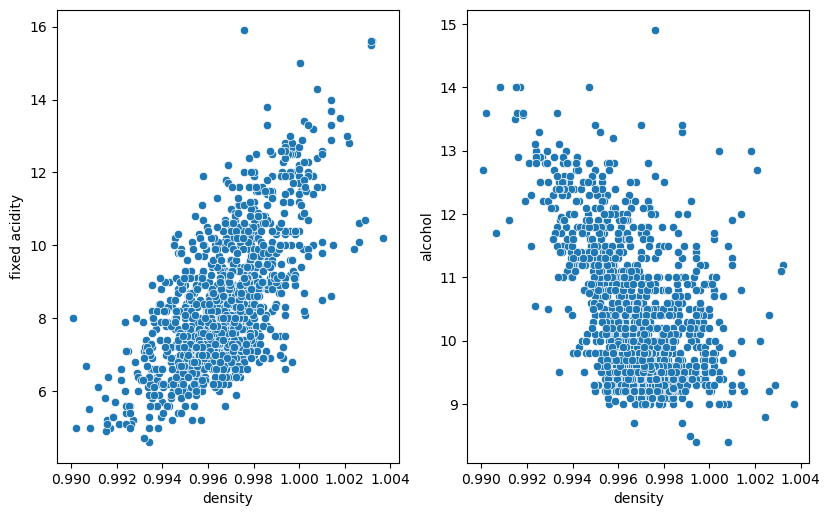

In [32]:
Y=data[['fixed acidity', 'alcohol']].copy()

plt.figure(figsize=(15,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'density', y = Y[column], data = data)

    plotnumber+=1
plt.show()

In [33]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

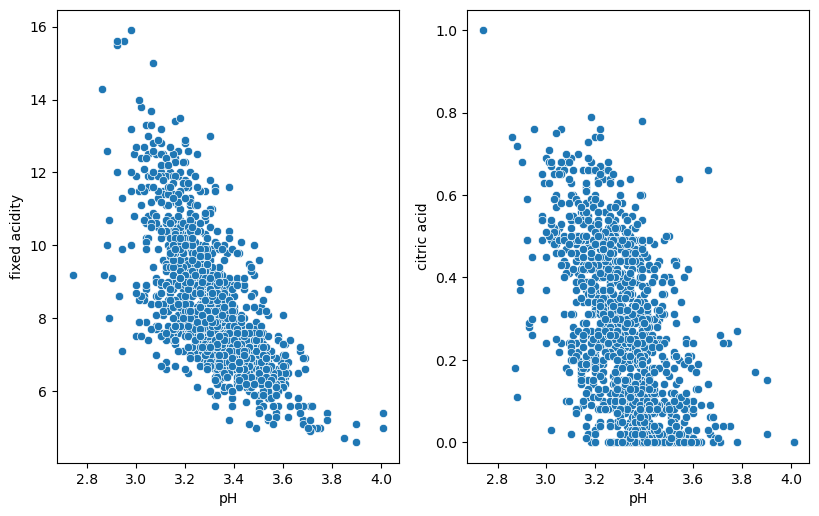

In [34]:
Y=data[['fixed acidity', 'citric acid']].copy()

plt.figure(figsize=(15,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'pH', y = Y[column], data = data)

    plotnumber+=1
plt.show()

In [35]:
vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif = vif.sort_values(by="VIF Scores", ascending=False)
vif

,VIF Scores,variables
7,1500.387873,density
8,1095.732046,pH
10,123.097449,alcohol
0,75.023032,fixed acidity
9,21.946341,sulphates
1,16.460387,volatile acidity
2,9.188892,citric acid
6,6.543918,total sulfur dioxide
5,6.432241,free sulfur dioxide
4,6.349793,chlorides


### Dropping columns

##### 'density','pH' has the highest multi-colinearity and also lowest contribution score. And we remove it. Also removing 'citric acid' & 'free sulfur dioxide', both have multi-colinearity and also low contribution score

In [36]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [37]:
data= data.drop(columns = ['density','pH','citric acid','free sulfur dioxide'])
data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,6
5,7.4,0.66,1.8,0.075,40.0,0.56,9.4,5


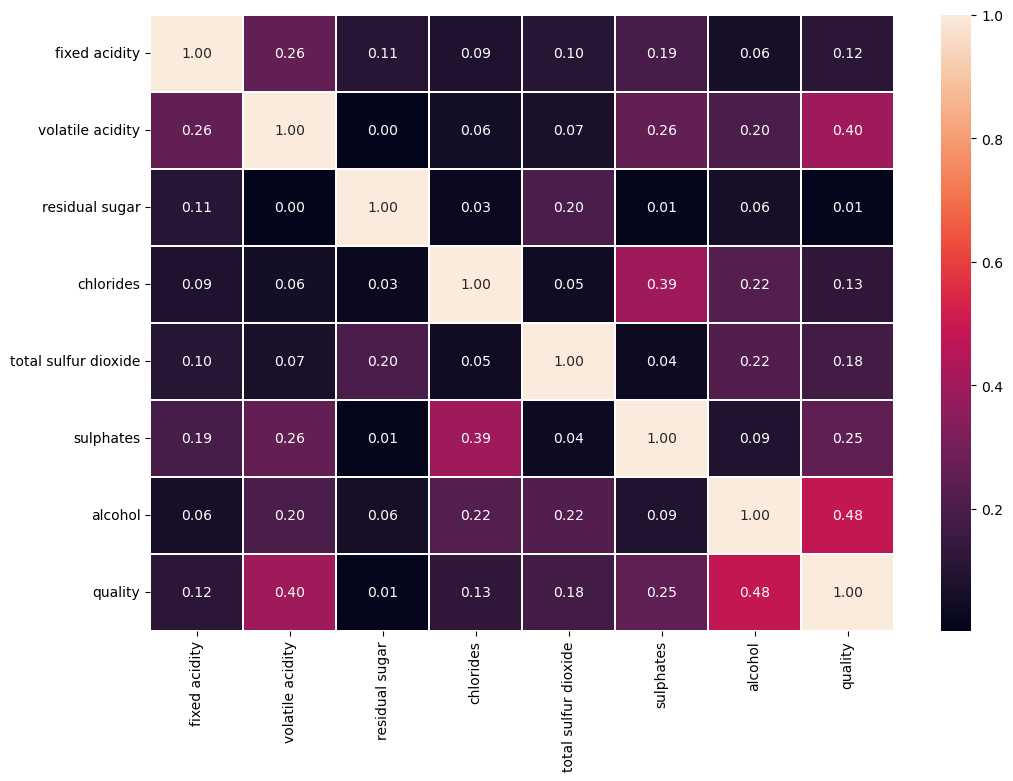

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = data.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(dt_corr, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

# 

# 

## Removing Skewness

In [39]:
from scipy.stats import skew

fixed acidity: 0.9400023708308168


<Figure size 2000x1500 with 0 Axes>

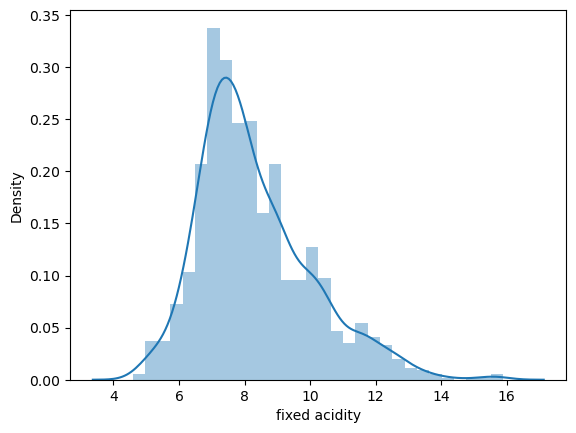

volatile acidity: 0.7284737558284394


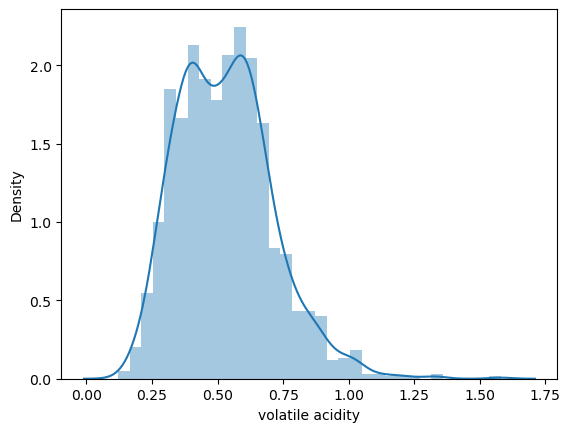

residual sugar: 4.543131827144295


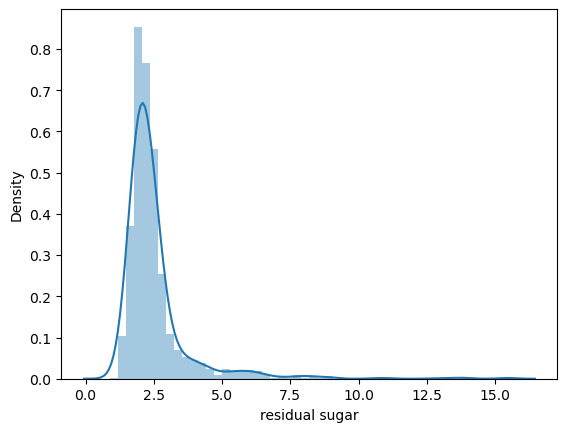

chlorides: 5.496412046041327


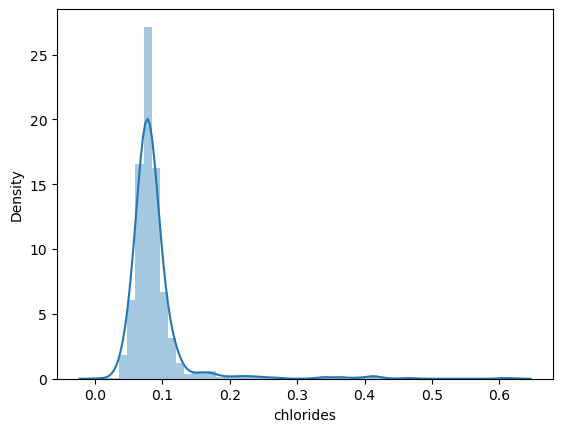

total sulfur dioxide: 1.538667370663026


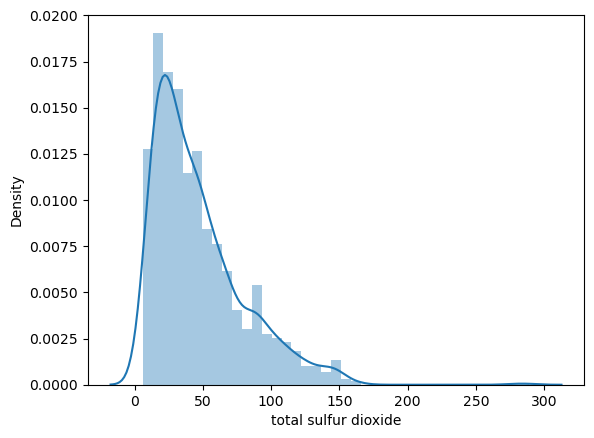

sulphates: 2.403847613657584


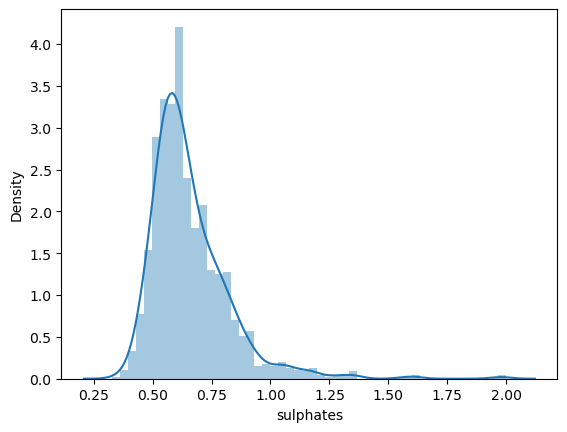

alcohol: 0.8588918260127338


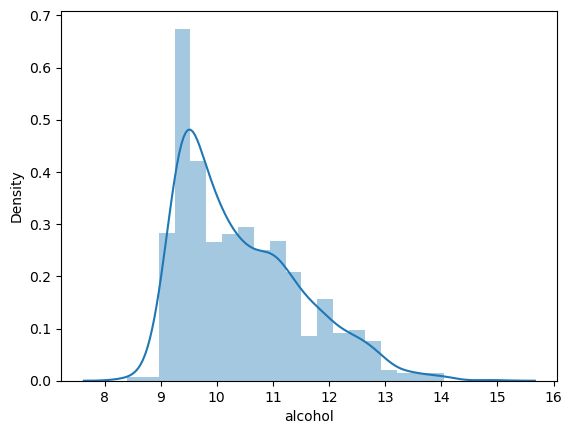

quality: 0.19219415286935035


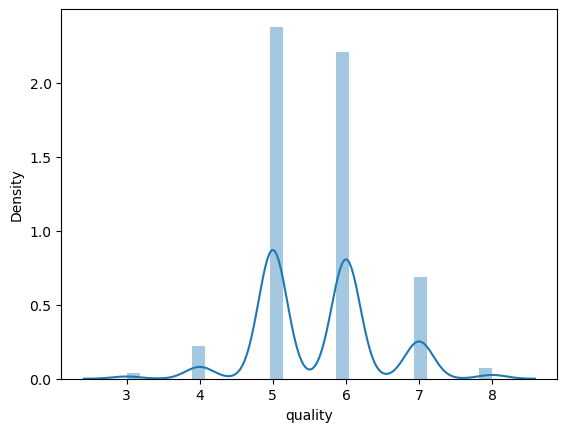

In [40]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    print(f"\033[1m{column}: {skew(data[column])}\033[0m")
    
    plt.figure()
    sns.distplot(data[column])
    
    plt.show()

In [41]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [42]:
data.skew()

fixed acidity           0.941041
volatile acidity        0.729279
residual sugar          4.548153
chlorides               5.502487
total sulfur dioxide    1.540368
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

##### All feature columns have skewness. Special columns 'residual sugar', 'chlorides', 'total sulfur dioxide' & 'sulphates' have very high skewness. But 'alcohol', 'volatile acidity' & 'sulphates' columns are very much colerated to column 'quality', hence they can't be removed

In [43]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
data['fixed acidity'] = np.log(data['fixed acidity'])
data['fixed acidity'].skew()

0.3488037361098303

In [45]:
data['residual sugar'] = np.cbrt(np.log(data['residual sugar']))
data['residual sugar'].skew()

-0.48847609634475003

In [46]:
data['chlorides'] = np.log(np.cbrt(data['chlorides']))
data['chlorides'].skew()

1.8876423282330945

In [47]:
data['total sulfur dioxide'] = np.cbrt(data['total sulfur dioxide'])
data['total sulfur dioxide'].skew()

0.3928159037623014

#### Reducing skewness of 'sulphates' column slightly as it is just 0.25 corelated with column 'quality'.

In [48]:
data['sulphates'] = np.log(data['sulphates'])
data['sulphates'].skew()

0.9614602293854239

In [49]:
data.shape

(1359, 8)

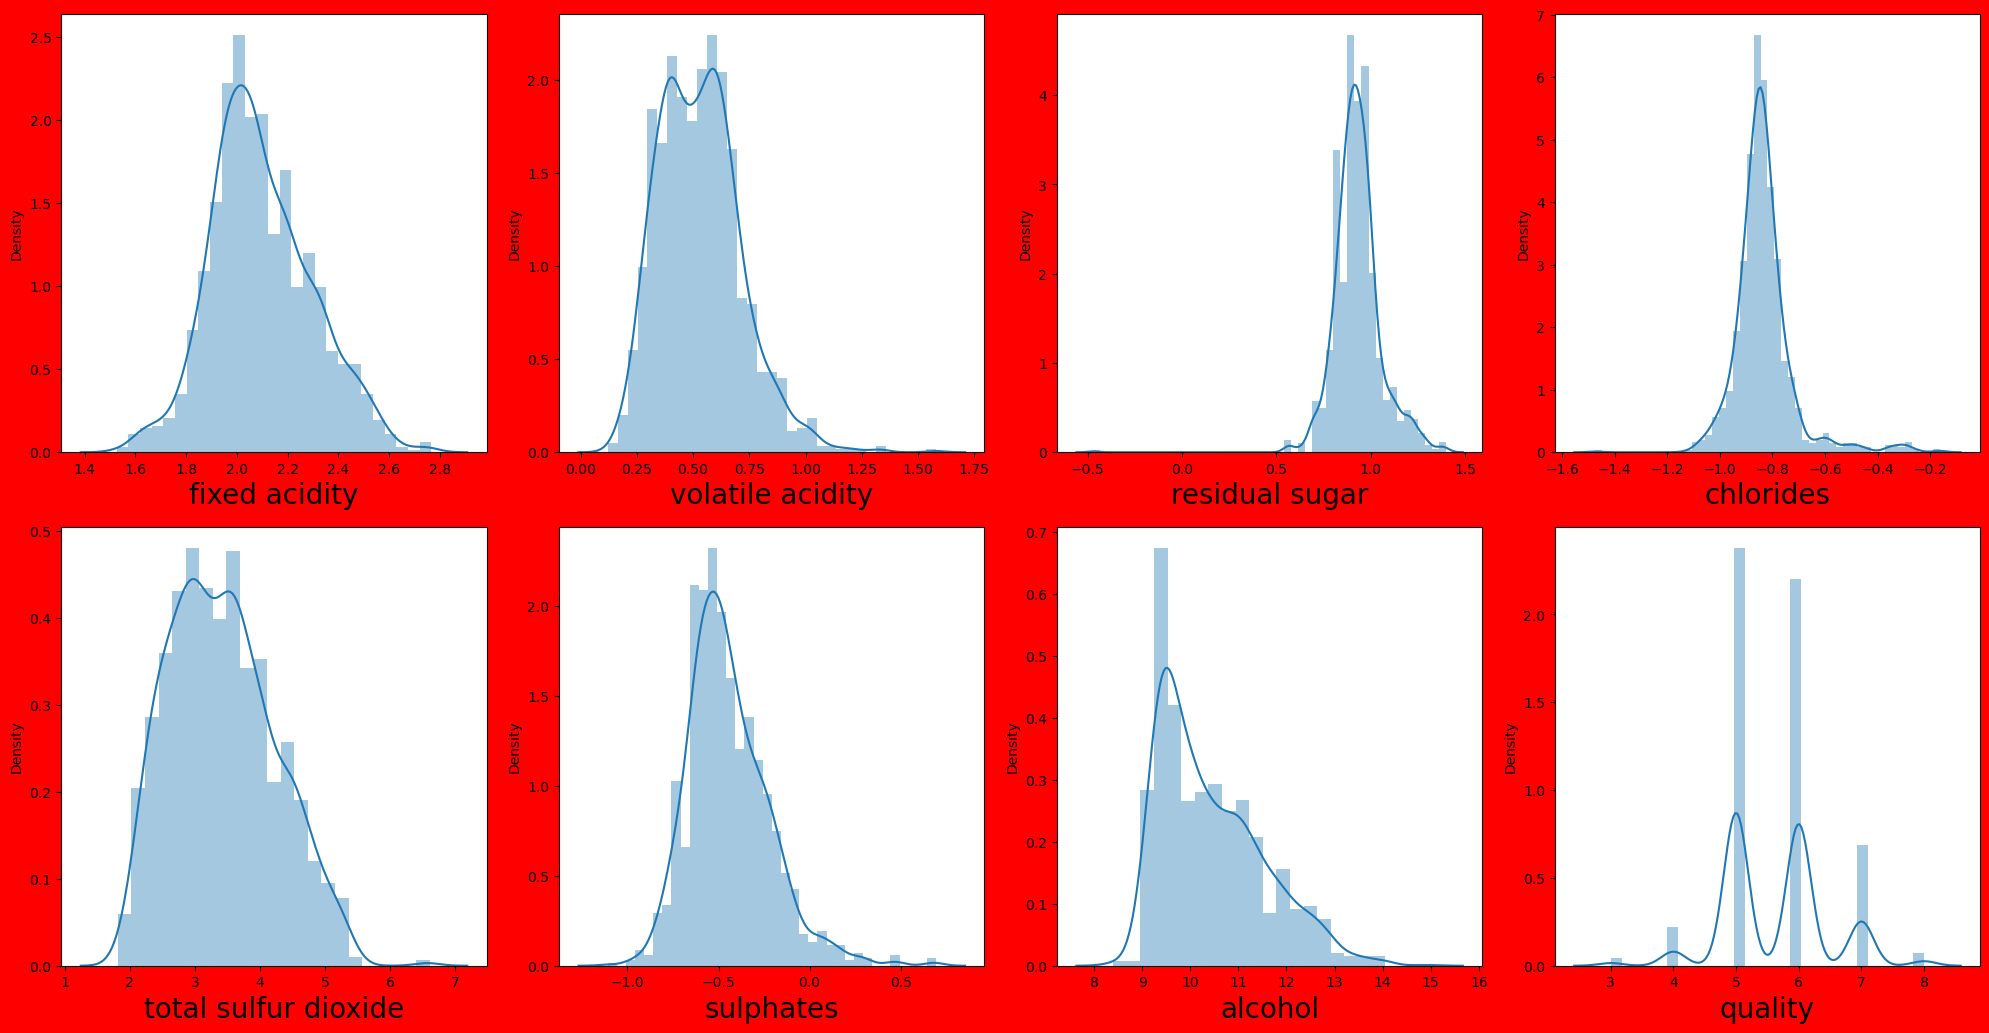

In [50]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:                       
    if plotnumber<=8:                    
        ax = plt.subplot(3,4,plotnumber)    
        sns.distplot(data[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()

# 

# 

## Removing Outliners

In [51]:
data.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2.097079,0.529478,0.930606,-0.834284,3.419014,-0.444642,10.432315,5.623252
std,0.200008,0.183031,0.124566,0.112015,0.805722,0.224199,1.082065,0.823578
min,1.526056,0.120000,-0.472309,-1.474283,1.817121,-1.108663,8.400000,3.000000
25%,1.960095,0.390000,0.862605,-0.886420,2.802039,-0.597837,9.500000,5.000000
50%,2.066863,0.520000,0.923831,-0.846102,3.361975,-0.478036,10.200000,6.000000
75%,2.219203,0.640000,0.984945,-0.798965,3.979057,-0.314711,11.100000,6.000000
max,2.766319,1.580000,1.399462,-0.164219,6.611489,0.693147,14.900000,8.000000


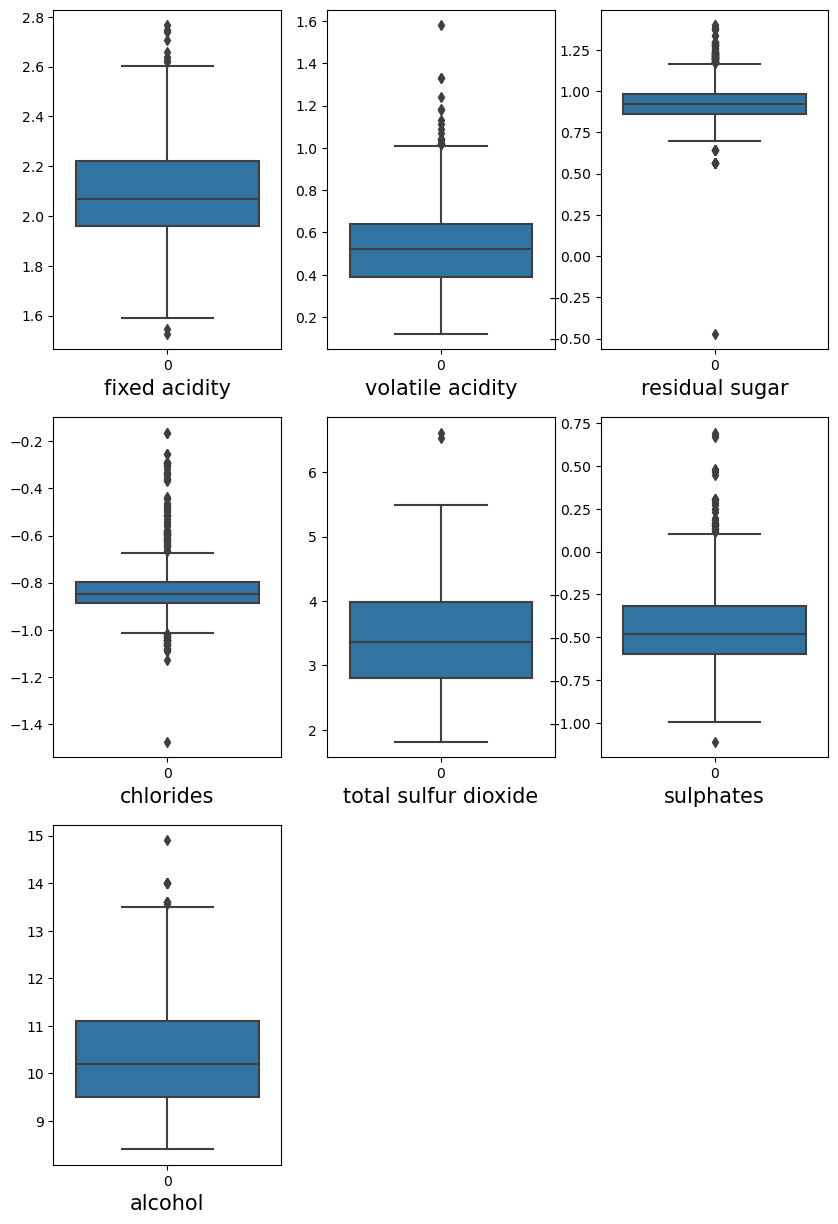

In [52]:
df_features = data.drop('quality',axis=1)

plt.figure(figsize=(10,15))
graph = 1

for column in df_features:  
    if graph<=13:
        plt.subplot(3, 3, graph)
        ax=sns.boxplot(data= df_features [column])
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [53]:
data.shape

(1359, 8)

In [54]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [55]:
from scipy.stats import zscore 

z_score = zscore(data.drop('quality',axis=1))
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.6).all(axis=1)
data = data[filtering_entry]

data.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,2.099753,0.522317,0.927322,-0.844413,3.392282,-0.461508,10.396621,5.628664
std,0.189519,0.168365,0.104524,0.076080,0.782332,0.192189,1.003028,0.799690
min,1.629241,0.120000,0.640179,-1.090056,1.817121,-0.994252,8.500000,3.000000
25%,1.960095,0.390000,0.862605,-0.886420,2.802039,-0.597837,9.500000,5.000000
50%,2.066863,0.520000,0.923831,-0.846102,3.332222,-0.478036,10.100000,6.000000
75%,2.219203,0.636250,0.984945,-0.806373,3.914868,-0.342490,11.100000,6.000000
max,2.602690,1.005000,1.248459,-0.546632,5.484807,0.131028,13.200000,8.000000


In [56]:
data.shape

(1228, 8)

# 

# 

# 

## Creating Classification Column [As per the requirement of the problem]

In [57]:
data.loc[data['quality'] >= 7,'Remark'] = 1 
data.loc[data['quality'] < 7,'Remark'] = 0

**1 ===> Good Quality  |  0 ===> Bad Quality**

In [58]:
data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality,Remark
0,2.001480,0.70,0.862605,-0.859007,3.239612,-0.579818,9.4,5,0.0
1,2.054124,0.88,0.984945,-0.774263,4.061548,-0.385662,9.8,5,0.0
2,2.054124,0.76,0.940876,-0.795322,3.779763,-0.430783,9.8,5,0.0
3,2.415914,0.28,0.862605,-0.863422,3.914868,-0.544727,9.8,6,0.0
5,2.001480,0.66,0.837671,-0.863422,3.419952,-0.579818,9.4,5,0.0


##### Now column 'Remark' will be the new Target Column

In [59]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol', 'quality', 'Remark'],
      dtype='object')

In [60]:
data['Remark'].unique()

array([0., 1.])

In [61]:
data['Remark'].dtypes

dtype('float64')

In [62]:
data['Remark'].value_counts()

0.0    1065
1.0     163
Name: Remark, dtype: int64

# 

# 

## Oversampling

In [63]:
data["Remark"].unique()

array([0., 1.])

In [64]:
data["Remark"].value_counts()

0.0    1065
1.0     163
Name: Remark, dtype: int64

In [65]:
x = data.drop(['Remark'],axis=1)
y = data['Remark'].values.reshape(-1, 1)

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
upsample = SMOTE()

In [68]:
x, y = upsample.fit_resample(x,y)

In [69]:
from collections import Counter
count = Counter(y)
print(count)

Counter({0.0: 1065, 1.0: 1065})


# 

# 

## Standardizing Features

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [72]:
x_scaled

array([[-0.69820985,  1.43291442, -0.69569419, ..., -0.96591986,
        -1.34285443, -1.30749927],
       [-0.41794875,  2.54300011,  0.48661107, ...,  0.0730787 ,
        -0.96765673, -1.30749927],
       [-0.41794875,  1.80294298,  0.06072684, ..., -0.16837695,
        -0.96765673, -1.30749927],
       ...,
       [ 1.01769874, -0.25981405, -0.51239945, ...,  0.97443045,
         0.23136916,  0.81115683],
       [ 1.01045825, -0.78668053, -0.28315603, ...,  0.15045534,
         1.18907251,  0.81115683],
       [ 1.62771684,  0.41600021,  1.93104213, ...,  1.09978146,
         0.90259562,  0.81115683]])

In [73]:
y = y.ravel()
y

array([0., 0., 0., ..., 1., 1., 1.])

# 

## Test - Train Split

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=348)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1597, 8)
(533, 8)
(1597,)
(533,)


# 

## Importing Metrices

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

# 

# 

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [79]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [80]:
cls_reg.coef_

array([[ 0.06588724, -0.22691137,  0.06727059, -0.01772656, -0.25378068,
         0.34996733,  0.41878031,  7.66523417]])

In [81]:
cls_reg.intercept_

array([-2.0112029])

### Accuracy Score of Training Data

In [82]:
print('Accuracy Score of Training Data:',cls_reg.score(x_train, y_train))

Accuracy Score of Training Data: 1.0


### Predicting Testing Data

In [83]:
y_pred = cls_reg.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0.

### Accuracy Score of Testing Data

In [84]:
print('Accuracy Score of Testing Data:',accuracy_score (y_test,y_pred))

Accuracy Score of Testing Data: 1.0


### Confusion Matrix

In [85]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   0],
       [  0, 261]], dtype=int64)

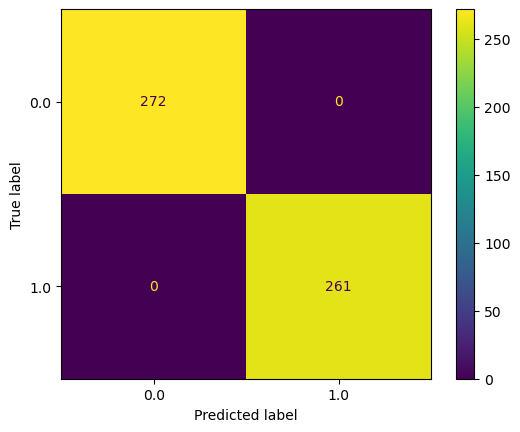

In [86]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_reg, x_test, y_test)
plt.show()

### Classification Report

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       272
         1.0       1.00      1.00      1.00       261

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



### Cross-validation

In [88]:
from sklearn.model_selection import KFold, cross_val_score

In [89]:
c1=cross_val_score(cls_reg, x_train, y_train, cv=5)
c1

array([1., 1., 1., 1., 1.])

In [90]:
c1.mean()

1.0

In [91]:
c2=cross_val_score(cls_reg, x_test, y_test, cv=5)
c2

array([1., 1., 1., 1., 1.])

In [92]:
c2.mean()

1.0

In [93]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

1.0

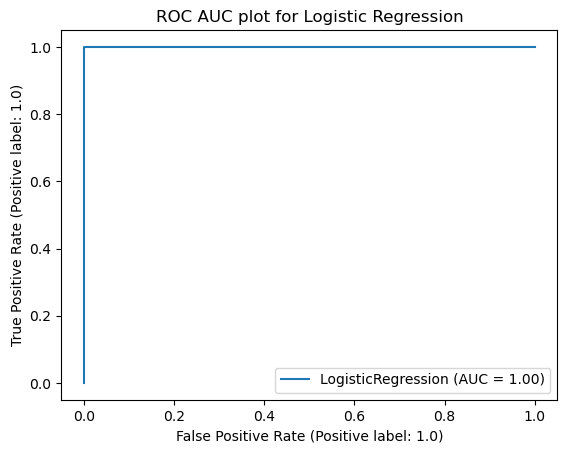

In [94]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_reg, x_test,y_test)
plt.title("ROC AUC plot for Logistic Regression")
plt.show()

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [96]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


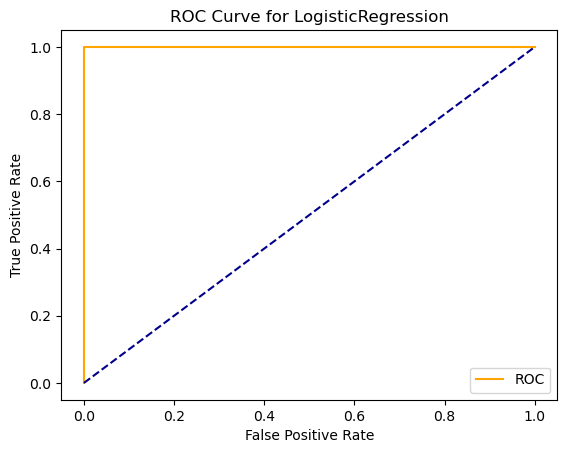

In [97]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

# 

# 

# DecisionTreeClassifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
cls_dec = DecisionTreeClassifier(criterion='gini',min_samples_leaf= 1, min_samples_split=2,max_depth=16)

In [100]:
cls_dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

### Accuracy Score of Training Data

In [101]:
print('Accuracy Score of Training Data::',cls_dec.score(x_train, y_train))

Accuracy Score of Training Data:: 1.0


### Predicting Testing Data

In [102]:
y_pred = cls_dec.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0.

### Accuracy Score of Testing Data

In [103]:
print('Accuracy Score of Testing Data:',accuracy_score (y_test,y_pred))

Accuracy Score of Testing Data: 1.0


### Confusion Matrix

In [104]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   0],
       [  0, 261]], dtype=int64)

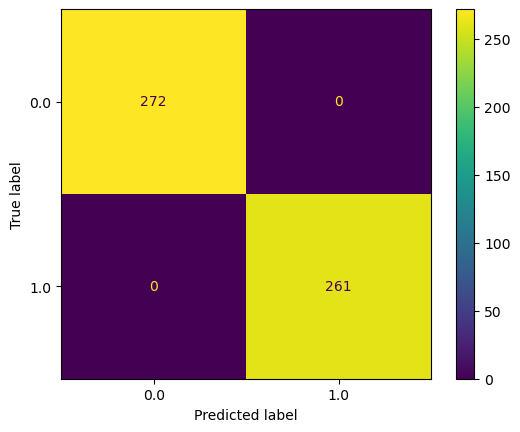

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_dec, x_test, y_test)
plt.show()

### Classification Report

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       272
         1.0       1.00      1.00      1.00       261

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



### Cross-validation

In [107]:
from sklearn.model_selection import KFold, cross_val_score

In [108]:
C3=cross_val_score(cls_dec, x_train, y_train, cv=5)
C3

array([1., 1., 1., 1., 1.])

In [109]:
C3.mean()

1.0

In [110]:
C4=cross_val_score(cls_dec, x_test, y_test, cv=5)
C4

array([1., 1., 1., 1., 1.])

In [111]:
C4.mean()

1.0

In [112]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

1.0

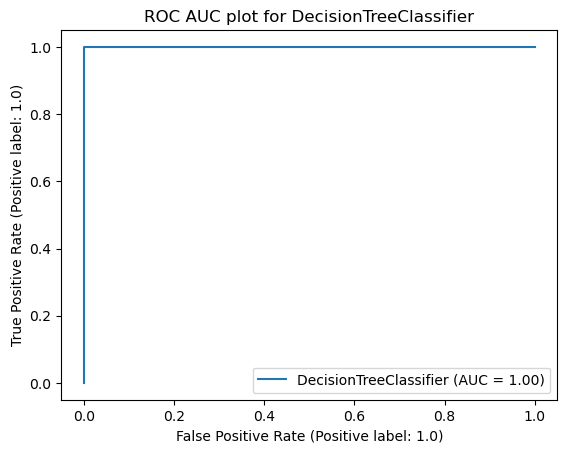

In [113]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_dec, x_test,y_test)
plt.title("ROC AUC plot for DecisionTreeClassifier")
plt.show()

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [115]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


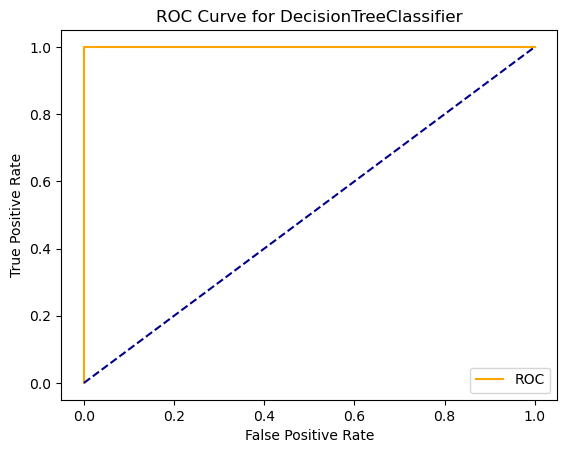

In [116]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

# 

# 

## Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3,
 'n_estimators': 50}

In [119]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=14)

In [120]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_split=3, n_estimators=450)

### Accuracy Score of Training Data

In [121]:
print('Accuracy Score of Training Data::',cls_rf.score(x_train, y_train))

Accuracy Score of Training Data:: 1.0


### Predicting Testing Data

In [122]:
y_pred = cls_rf.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0.

### Accuracy Score of Testing Data

In [123]:
print('Accuracy Score of Testing Data:',accuracy_score (y_test,y_pred))

Accuracy Score of Testing Data: 1.0


### Confusion Matrix

In [124]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   0],
       [  0, 261]], dtype=int64)

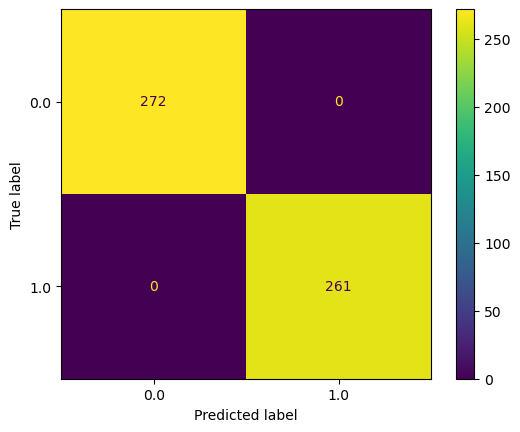

In [125]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_rf, x_test, y_test)
plt.show()

### Classification Report

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       272
         1.0       1.00      1.00      1.00       261

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



### Cross-validation

In [127]:
from sklearn.model_selection import KFold, cross_val_score

In [128]:
c5=cross_val_score(cls_rf, x_train, y_train, cv=5)
c5

array([1., 1., 1., 1., 1.])

In [129]:
c5.mean()

1.0

In [130]:
c6=cross_val_score(cls_rf, x_test, y_test, cv=5)
c6

array([1., 1., 1., 1., 1.])

In [131]:
c6.mean()

1.0

In [132]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

1.0

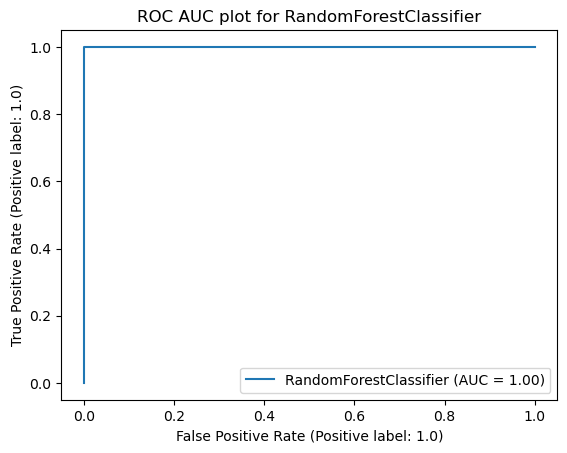

In [133]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_rf, x_test,y_test)
plt.title("ROC AUC plot for RandomForestClassifier")
plt.show()

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [135]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


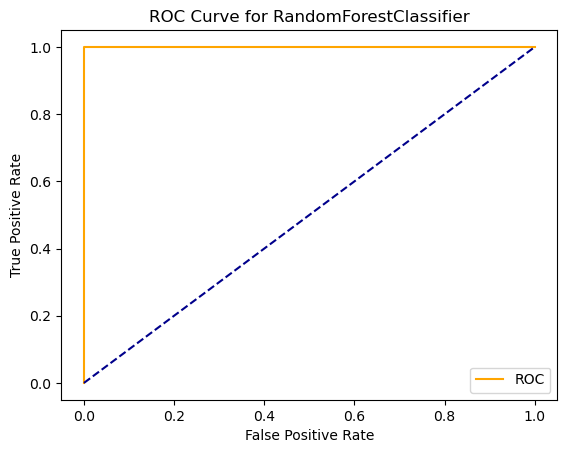

In [136]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

# 

# KNeighbors Classifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [139]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

### Accuracy Score of Training Data

In [140]:
print('Accuracy Score of Training Data::',cls_KN.score(x_train, y_train))

Accuracy Score of Training Data:: 1.0


### Predicting Testing Data

In [141]:
y_pred = cls_KN.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0.

### Accuracy Score of Testing Data

In [142]:
print('Accuracy Score of Testing Data:',accuracy_score (y_test,y_pred))

Accuracy Score of Testing Data: 0.9699812382739212


### Confusion Matrix

In [143]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[256,  16],
       [  0, 261]], dtype=int64)

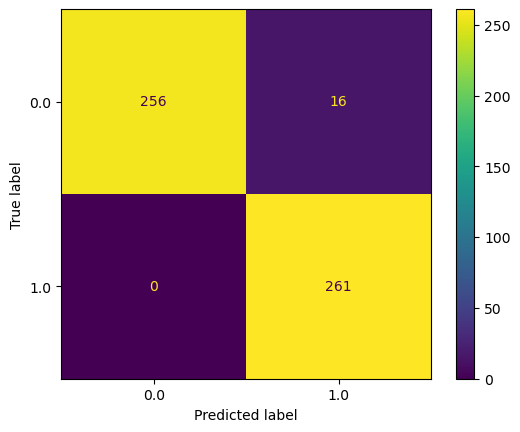

In [144]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_KN, x_test, y_test)
plt.show()

### Classification Report

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       272
         1.0       0.94      1.00      0.97       261

    accuracy                           0.97       533
   macro avg       0.97      0.97      0.97       533
weighted avg       0.97      0.97      0.97       533



### Cross-validation

In [146]:
from sklearn.model_selection import KFold, cross_val_score

In [147]:
c7=cross_val_score(cls_KN, x_train, y_train, cv=5)
c7

array([0.984375  , 0.98125   , 0.97492163, 0.96551724, 0.98432602])

In [148]:
c7.mean()

0.9780779780564263

In [149]:
c8=cross_val_score(cls_KN, x_test, y_test, cv=5)
c8

array([0.96261682, 0.91588785, 0.98130841, 0.99056604, 0.94339623])

In [150]:
c8.mean()

0.9587550696526185

In [151]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.9705882352941176

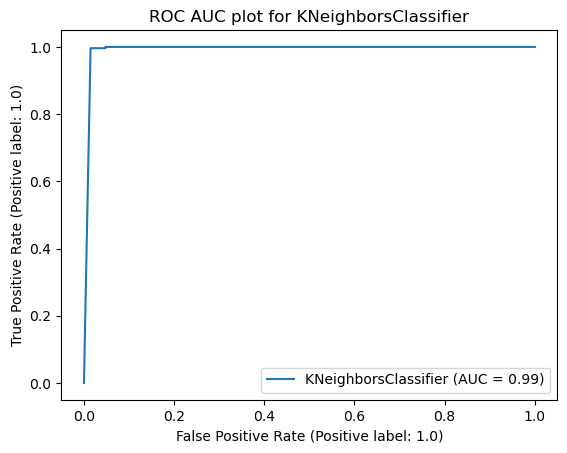

In [152]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_KN, x_test,y_test)
plt.title("ROC AUC plot for KNeighborsClassifier")
plt.show()

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [154]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0.         0.05882353 1.        ]


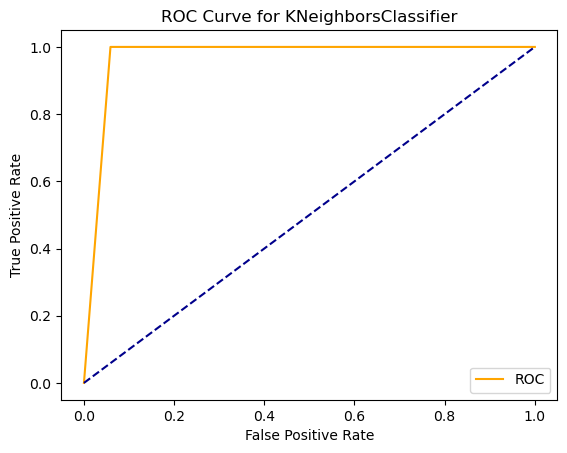

In [155]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

# 

# 

# Support Vector Classifier

In [156]:
from sklearn.svm import SVC

In [157]:
cls_SVC = SVC(kernel='rbf',C=695, gamma=1)

In [158]:
cls_SVC.fit(x_train, y_train)

SVC(C=695, gamma=1)

### Accuracy Score of Training Data

In [159]:
print('Accuracy Score of Training Data::',cls_SVC.score(x_train, y_train))

Accuracy Score of Training Data:: 1.0


### Predicting Testing Data

In [160]:
y_pred = cls_SVC.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0.

### Accuracy Score of Testing Data

In [161]:
print('Accuracy Score of Testing Data:',accuracy_score (y_test,y_pred))

Accuracy Score of Testing Data: 0.9962476547842402


### Confusion Matrix

In [162]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   0],
       [  2, 259]], dtype=int64)

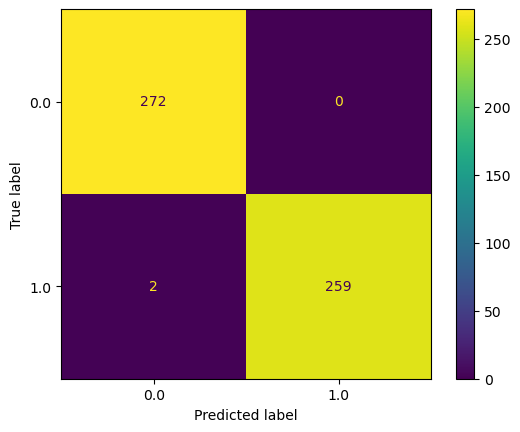

In [163]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_SVC, x_test, y_test)
plt.show()

### Classification Report

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       272
         1.0       1.00      0.99      1.00       261

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



### Cross-validation

In [165]:
from sklearn.model_selection import KFold, cross_val_score

In [166]:
c9=cross_val_score(cls_SVC, x_train, y_train, cv=5)
c9

array([1.        , 0.9875    , 0.9968652 , 0.99373041, 0.99373041])

In [167]:
c9.mean()

0.9943652037617555

In [168]:
c10=cross_val_score(cls_SVC, x_test, y_test, cv=5)
c10

array([0.97196262, 0.97196262, 0.93457944, 0.95283019, 0.98113208])

In [169]:
c10.mean()

0.9624933874096279

In [170]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.9961685823754789

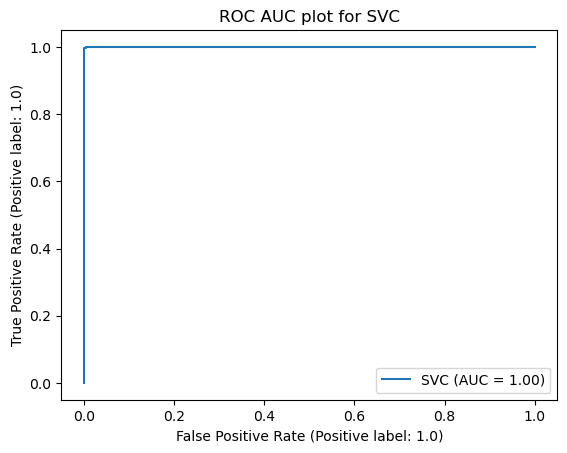

In [171]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_SVC, x_test,y_test)
plt.title("ROC AUC plot for SVC")
plt.show()

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [173]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0.         0.99233716 1.        ]
False Positive rate =  [0. 0. 1.]


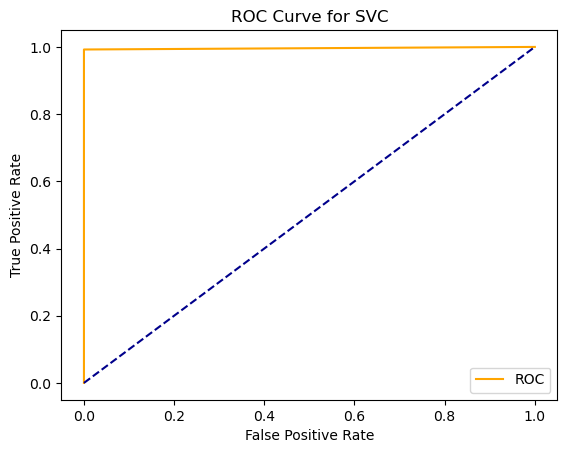

In [174]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend()
plt.show()

# 

# 

# Gradient Boosting Classifier

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
cls_gb = GradientBoostingClassifier(learning_rate=1)

In [176]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1)

### Accuracy Score of Training Data

In [177]:
print('Accuracy Score of Training Data::',cls_gb.score(x_train, y_train))

Accuracy Score of Training Data:: 1.0


### Predicting Testing Data

In [178]:
y_pred = cls_gb.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0.

### Accuracy Score of Testing Data

In [179]:
print('Accuracy Score of Testing Data:',accuracy_score (y_test,y_pred))

Accuracy Score of Testing Data: 1.0


### Confusion Matrix

In [180]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[272,   0],
       [  0, 261]], dtype=int64)

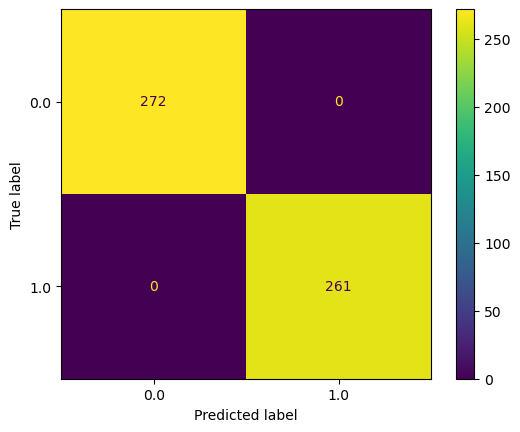

In [181]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_gb, x_test, y_test)
plt.show()

### Classification Report

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       272
         1.0       1.00      1.00      1.00       261

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



### Cross-validation

In [183]:
from sklearn.model_selection import KFold, cross_val_score

In [184]:
c11=cross_val_score(cls_gb, x_train, y_train, cv=5)
c11

array([1., 1., 1., 1., 1.])

In [185]:
c11.mean()

1.0

In [186]:
c12=cross_val_score(cls_gb, x_test, y_test, cv=5)
c12

array([1., 1., 1., 1., 1.])

In [187]:
c12.mean()

1.0

In [188]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

1.0

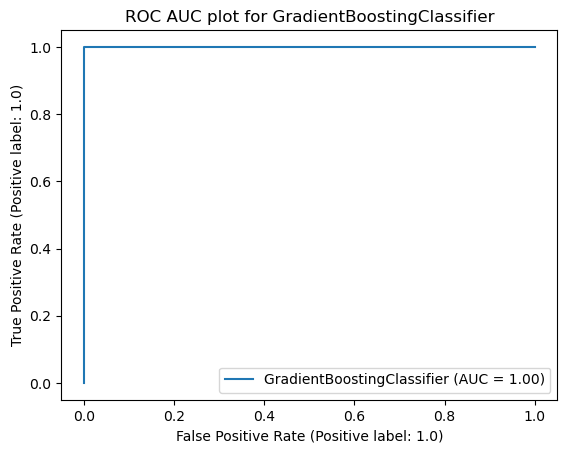

In [189]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_gb, x_test,y_test)
plt.title("ROC AUC plot for GradientBoostingClassifier")
plt.show()

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [191]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


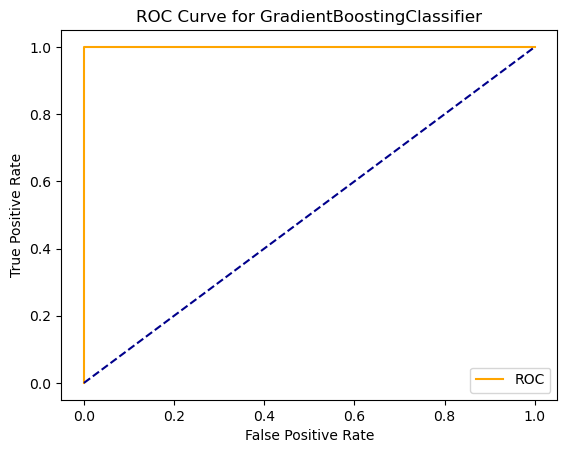

In [192]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

# 

# 

# 

# Plotting ROC Curve for all models

In [193]:
from sklearn.metrics import plot_roc_curve

#### On Training Data

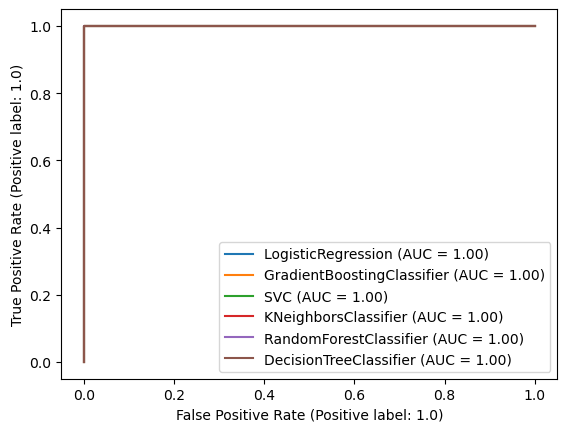

In [194]:
disp = plot_roc_curve (cls_reg, x_train, y_train)

plot_roc_curve (cls_gb, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_SVC, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_KN, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_dec, x_train, y_train, ax=disp.ax_)
plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

#### On Testing Data

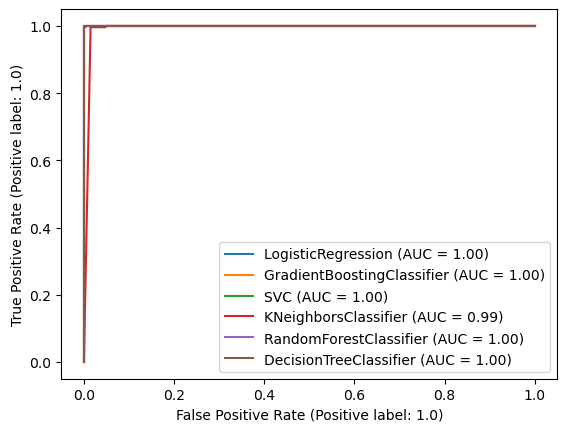

In [195]:
disp = plot_roc_curve (cls_reg, x_test, y_test)

plot_roc_curve (cls_gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_KN, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_dec, x_test, y_test, ax=disp.ax_)
plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

# 

# 

## Saving the Top 3 Best Models

In [196]:
import pickle 

In [197]:
with open('cls_rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

In [198]:
with open('cls_dec', 'wb') as f: 
    pickle.dump(cls_dec, f)

In [199]:
with open('cls_SVC', 'wb') as f: 
    pickle.dump(cls_SVC, f)

# 

## Opening the Saved Models

In [200]:
with open('cls_rf', 'rb') as f:
    l1 = pickle.load(f)

In [201]:
with open('cls_dec', 'rb') as f:
    l2 = pickle.load(f)

In [202]:
with open('cls_SVC', 'rb') as f:
    l3 = pickle.load(f)

# 

## Prediction

In [203]:
l1.predict(scaler.transform([[2.001480,0.70,0.862605,-0.859007,3.239612,-0.579818,9.4,5]]))

array([0.])

In [204]:
l2.predict(scaler.transform([[2.001480,0.70,0.862605,-0.859007,3.239612,-0.579818,9.4,5]]))

array([0.])

In [205]:
l3.predict(scaler.transform([[2.001480,0.70,0.862605,-0.859007,3.239612,-0.579818,9.4,5]]))

array([0.])

# 

# 